In [145]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Wholesale customers data.csv")
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [147]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [148]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [149]:
df.sample()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
212,1,1,7291,1012,2062,1291,240,1775


In [150]:
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
28,2,3,4113,20484,25957,1158,8604,5206
275,1,3,680,1610,223,862,96,379
104,1,3,14100,2132,3445,1336,1491,548
24,2,3,22647,9776,13792,2915,4482,5778
375,1,3,5841,1450,1162,597,476,70


In [151]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [153]:
df.drop('Channel',axis=1).corr()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [154]:
df.drop('Milk',axis=1).corr()

,Channel,Region,Fresh,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,-0.011854,0.345881,-0.101953,0.244690
Grocery,0.608792,0.007696,-0.011854,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.205497,0.390947,0.069291,1.000000


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Fresh'>

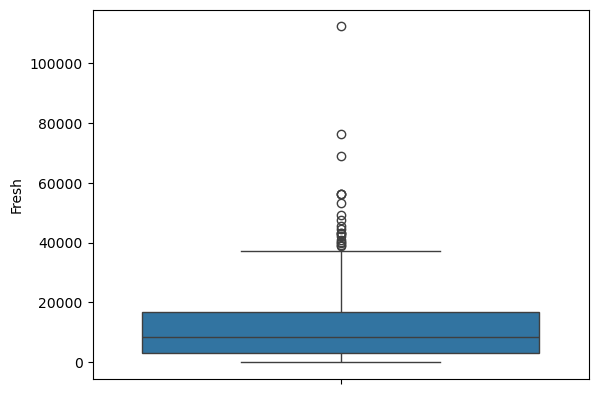

In [156]:
sns.boxplot(df['Fresh'])

<function matplotlib.pyplot.show(close=None, block=None)>

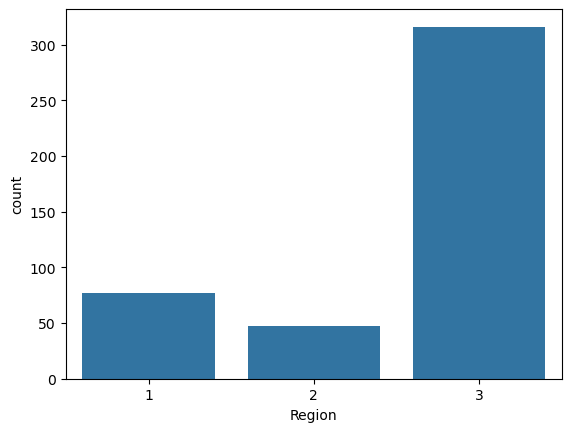

In [157]:
sns.countplot(x=df['Region'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

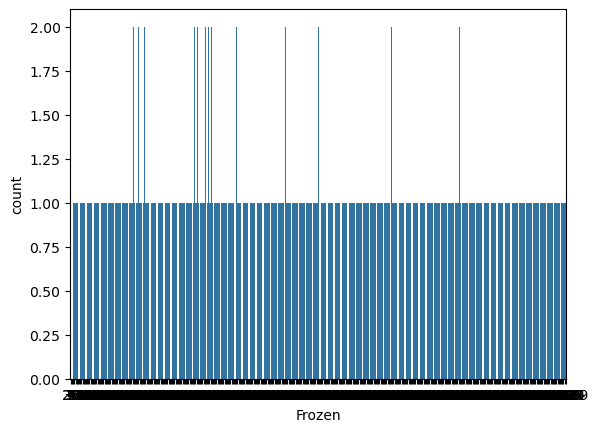

In [158]:
sns.countplot(x=df['Frozen'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

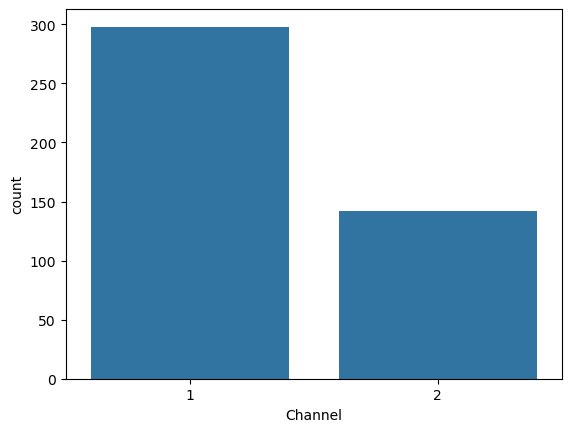

In [159]:
sns.countplot(x=df['Channel'])
plt.show

In [160]:
import warnings
warnings.filterwarnings('ignore')

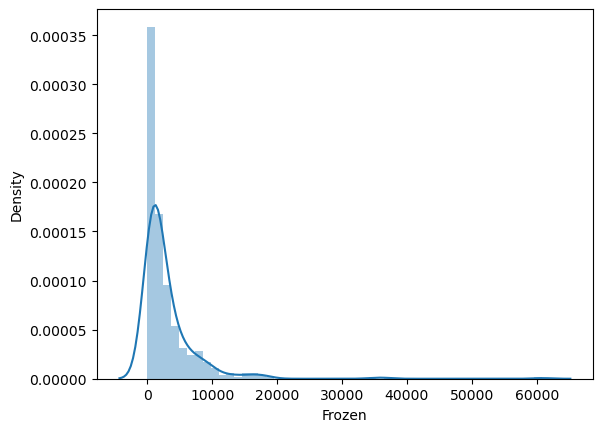

In [161]:
sns.distplot(df['Frozen'])
plt.show()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Channel', ylabel='Density'>

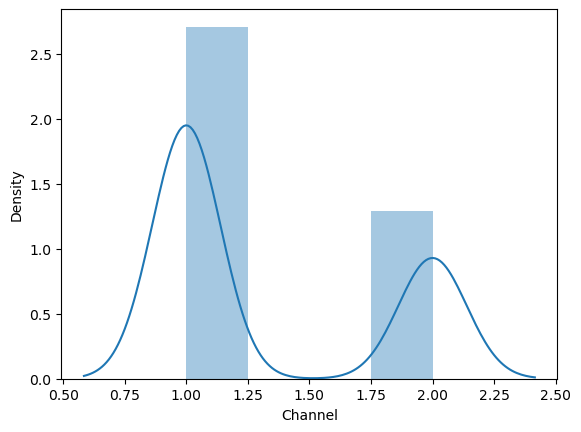

In [163]:
sns.distplot(df['Channel'])

<Axes: xlabel='Region', ylabel='Density'>

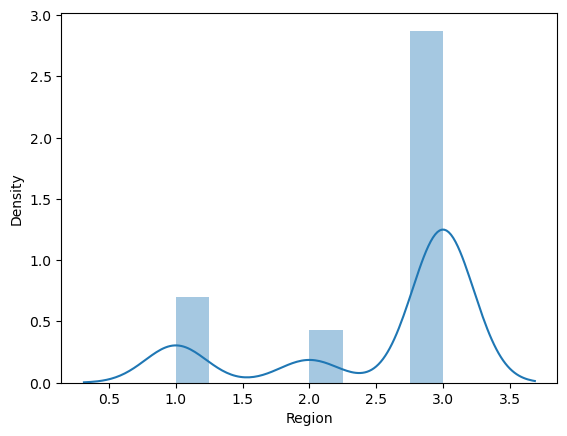

In [164]:
sns.distplot(df['Region'])

<Axes: xlabel='Fresh', ylabel='Density'>

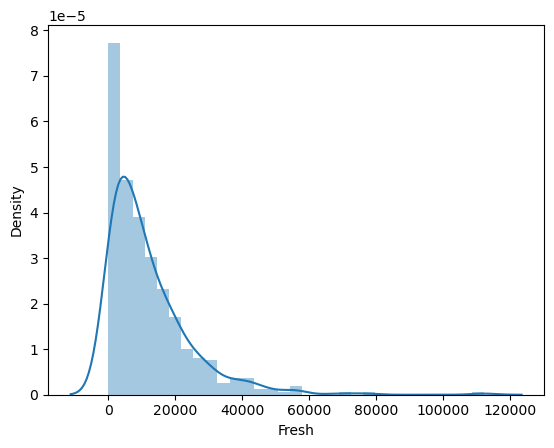

In [165]:
sns.distplot(df['Fresh'])

<Axes: xlabel='Frozen', ylabel='Fresh'>

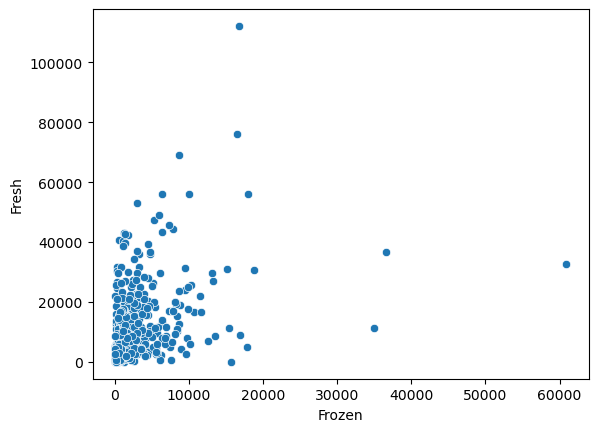

In [166]:
sns.scatterplot(x=df['Frozen'],y=df['Fresh'],palette=['yellow','green'])

In [167]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [168]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [169]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

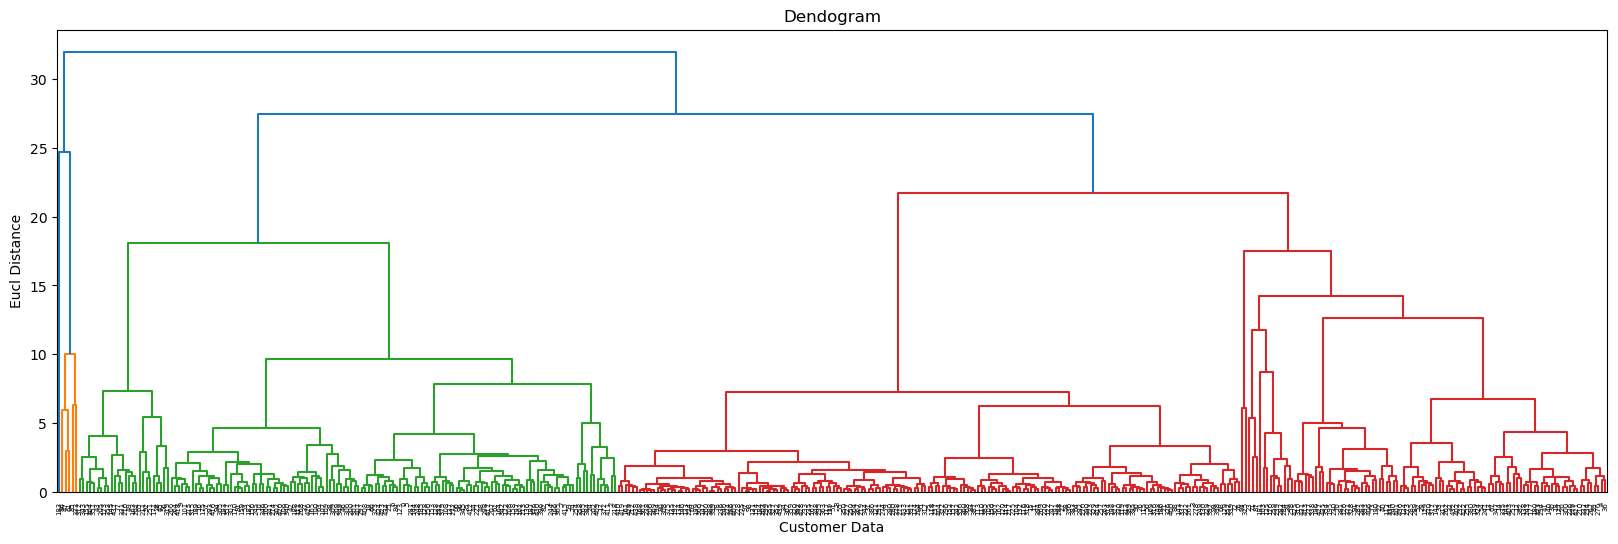

In [170]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer Data')
plt.ylabel('Eucl Distance')
plt.show()

In [171]:
len(set(dendo['color_list']))

4

In [172]:
from sklearn.cluster import AgglomerativeClustering

In [173]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [174]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [175]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [176]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [177]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [178]:
cust_group_data=pd.concat([df,group_num],axis=1)
cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [179]:
from sklearn .metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [180]:
cluster.shape

(440,)

In [181]:
#kemans
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [182]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

In [183]:
wcss

[2266.955266583245,
 1644.059851234756,
 1326.6746082135533,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388114,
 791.8280762163155,
 710.1943394067517,
 668.22250548469]

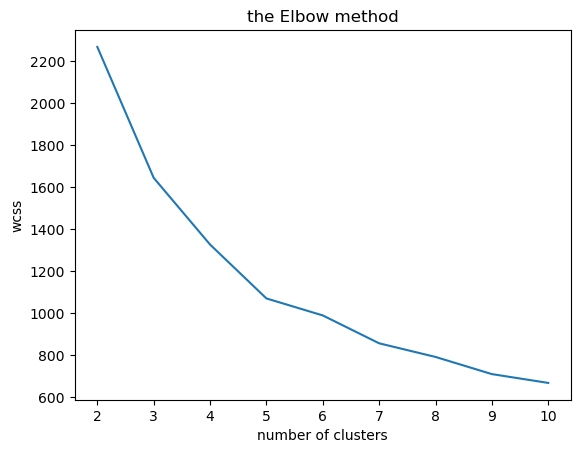

In [184]:
plt.plot(range(2,11),wcss)
plt.title('the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [231]:
model = KMeans (n_clusters = 4, random_state =42)
groups = model.fit_predict(X)
print(groups)

[3 0 0 3 3 3 3 3 3 0 0 3 0 0 0 3 0 3 3 3 3 3 3 1 0 3 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 3 3 0 0 0 0 0 2 0 0 3 3 3 0 3 3 2 0 3 3 3 2 3 0 3 2 3 0 3 3 3 1 3 3
 3 3 3 0 3 3 3 0 0 3 3 2 2 1 3 3 3 3 2 1 0 3 3 3 3 3 0 0 0 3 3 3 0 0 0 0 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 3 3 3 3 3 0 0 3 0 0 0 3 3 0 0 0 0 3 3 3 0 0 3 0 3 0 3 3 3 3 3 1 0 1 3
 3 3 0 0 0 3 3 3 0 3 3 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 2 3 0 0 0 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 2 3 3 0 3 3 3 3
 3 3 3 3 3 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3
 3 3 0 3 3 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 1 3 3 3 3 3 0 3
 2 3 3 3 3 3 3 0 0 0 0 3 3 0 3 3 0 3 0 3 0 3 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3]


In [233]:
groups.shape

(440,)

In [237]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,3
1,0
2,0
3,3
4,3
...,...
435,3
436,3
437,0
438,3


In [239]:
cust_means_data=pd.concat([df,group_num],axis=1)
cust_means_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,3


In [243]:
silhouette_score(X,groups)

0.34939129340421093